<a href="https://colab.research.google.com/github/sarahatef01/chocolate-sales-analysis/blob/main/chocolate_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Chocolate Sales.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


1094 sales have been done this year with an average of 162 boxes per sale and median 135 boxes per sale, while the maximum was 709 boxes

In [ ]:
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [ ]:
# converting the ammount into float after removing the $ sign
df['Amount']=df['Amount'].replace('[\$,]', '', regex=True).astype(float)
# convert date to a dateobject
df['Date']=pd.to_datetime(df['Date'], format='mixed',dayfirst=True)

In [ ]:
#checking countries for spelling mistakes, all "unique" values are truly unique
df['Country'].unique()
df['Product'].unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

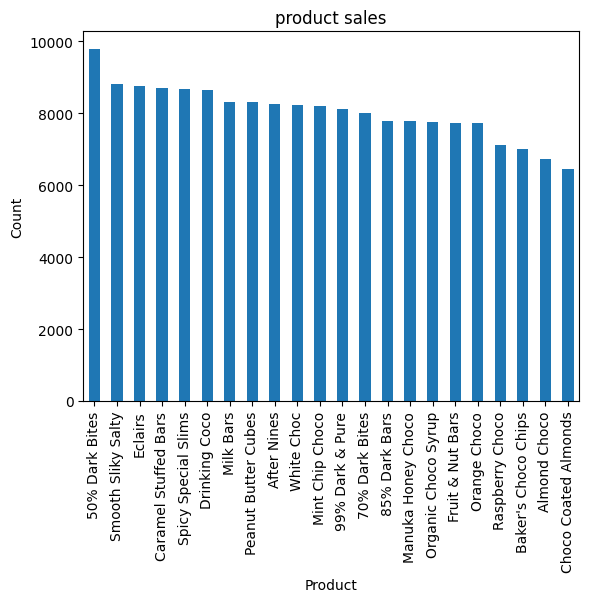

In [ ]:
#most selling products
productsales = df.groupby("Product")["Boxes Shipped"].sum().sort_values(ascending=False)
productsales.plot(kind="bar")
plt.title('product sales')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

In [ ]:
print("best selling product is",productsales.idxmax(),"with",productsales.max(),"boxes sold")
print("worst selling product is",productsales.idxmin(),"with",productsales.min(),"boxes sold")


best selling product is 50% Dark Bites with 9792 boxes sold
worst selling product is Choco Coated Almonds with 6464 boxes sold


there has been a decline in sales june to august while no sales were done september to december

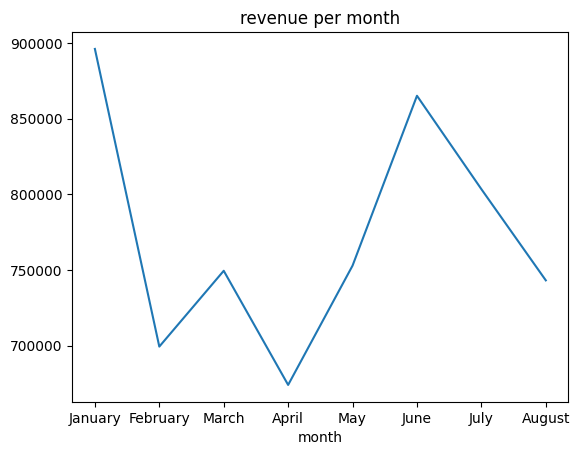

In [ ]:
df["month"]=df["Date"].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August']
monthly_sales = df.groupby('month')['Amount'].sum().reindex(month_order)
monthly_sales.plot(kind='line')
plt.title('revenue per month')
plt.show()

consider producing extra stock in months which demand of the product peaks

In [ ]:
monthly_product_sales_pivot = df.pivot_table(
    index='month',
    columns='Product',
    values='Boxes Shipped',
    aggfunc='sum', # Crucial: Tell pivot_table how to aggregate the values
    fill_value=0
)
monthly_product_sales_pivot = monthly_product_sales_pivot.reindex(month_order)

print(monthly_product_sales_pivot)

Product   50% Dark Bites  70% Dark Bites  85% Dark Bars  99% Dark & Pure  \
month                                                                      
January             1888            1159            402             1552   
February             821            1320            866              647   
March                835             964            172              606   
April               1014            1444           1818              183   
May                 1397             723           1205             1039   
June                1681            1785           1439             1397   
July                1488             195            587              691   
August               668             425           1304             2012   

Product   After Nines  Almond Choco  Baker's Choco Chips  \
month                                                      
January          1908          1508                 1314   
February           47           909                  774   

In [ ]:
results = []
for month_name, row_data in monthly_product_sales_pivot.iterrows():
    # Find the maximum sales for the current month
    max_boxes_sold = row_data.max()


    top_products = row_data[row_data == max_boxes_sold].index.tolist()

    results.append({
            'Month': month_name,
            'Most Sold Product': ', '.join(top_products), # Join multiple if there's a tie
            'Boxes Sold': max_boxes_sold
        })

most_sold_products_per_month = pd.DataFrame(results)
print(most_sold_products_per_month)

      Month    Most Sold Product  Boxes Sold
0   January  Organic Choco Syrup        2062
1  February  Spicy Special Slims        1616
2     March   Smooth Sliky Salty        2034
3     April        85% Dark Bars        1818
4       May   Smooth Sliky Salty        1526
5      June     Fruit & Nut Bars        1976
6      July   Manuka Honey Choco        2071
7    August      99% Dark & Pure        2012


In [ ]:
salesperson = df['Sales Person'].value_counts().sort_values(ascending=False)
top_seller = salesperson.idxmax()
print("most sales performed by",top_seller,"with",salesperson[top_seller],"sales")
averagesales = salesperson.mean()
print("the average number of sales per employee",averagesales)


most sales performed by Kelci Walkden with 54 sales
the average number of sales per employee 43.76


In [ ]:
print("--- number of sales --- ")
print(salesperson)

--- number of sales --- 
Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Oby Sorrel             49
Dennison Crosswaite    49
Ches Bonnell           48
Gigi Bohling           47
Karlen McCaffrey       47
Curtice Advani         46
Madelene Upcott        45
Kaine Padly            45
Marney O'Breen         45
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Barr Faughny           43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Rafaelita Blaksland    34
Wilone O'Kielt         34
Camilla Castle         32
Name: count, dtype: int64


In [ ]:
salespersonrevenue = df.groupby("Sales Person")["Amount"].sum().sort_values(ascending=False)
print("--- revenue --- ")
print(salespersonrevenue)

most revenue 
Sales Person
Ches Bonnell           320901.0
Oby Sorrel             316645.0
Madelene Upcott        316099.0
Brien Boise            312816.0
Kelci Walkden          311710.0
Van Tuxwell            303149.0
Dennison Crosswaite    291669.0
Beverie Moffet         278922.0
Kaine Padly            266490.0
Marney O'Breen         259742.0
Barr Faughny           258713.0
Roddy Speechley        251062.0
Gunar Cockshoot        238483.0
Gigi Bohling           232666.0
Karlen McCaffrey       223895.0
Jehu Rudeforth         220976.0
Jan Morforth           219667.0
Curtice Advani         216461.0
Rafaelita Blaksland    210245.0
Husein Augar           205212.0
Andria Kimpton         201747.0
Mallorie Waber         200592.0
Camilla Castle         196616.0
Dotty Strutley         190624.0
Wilone O'Kielt         138523.0
Name: Amount, dtype: float64


sales per countrey are almost identical

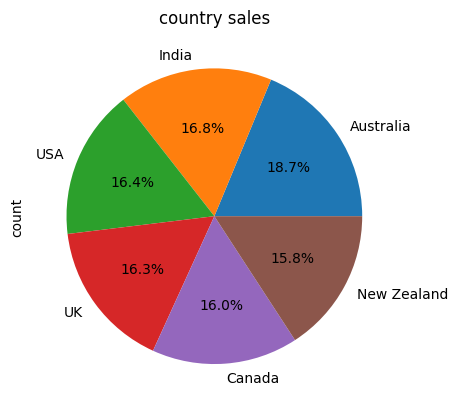

In [ ]:
countries = df['Country'].value_counts()
countries.plot(kind="pie",autopct='%1.1f%%')
plt.title('country sales')
plt.show()


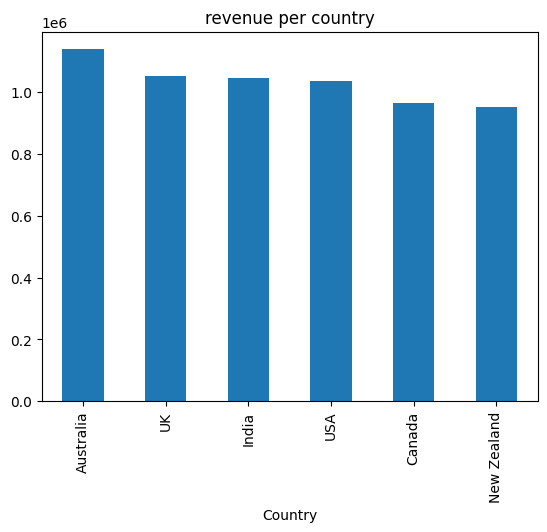

In [ ]:
revenue_per_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
revenue_per_country.plot(kind='bar')
plt.title('revenue per country')
plt.show()